Data source: https://archive.ics.uci.edu/dataset/222/bank+marketing  

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).  


### Input variables

**bank client data:**  
   1 - `age` (numeric)  
   2 - `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
   3 - `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
   4 - `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
   5 - `default`: has credit in default? (categorical: 'no','yes','unknown')  
   6 - `housing`: has housing loan? (categorical: 'no','yes','unknown')  
   7 - `loan`: has personal loan? (categorical: 'no','yes','unknown')  

**related with the last contact of the current campaign:**  
   8 - `contact`: contact communication type (categorical: 'cellular','telephone')  
   9 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
  10 - `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
  11 - `duration`: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and **should be discarded if the intention is to have a realistic predictive model**.  

**other attributes:**  
  12 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; **999 means client was not previously contacted**)  
  14 - `previous`: number of contacts performed before this campaign and for this client (numeric)  
  15 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

**social and economic context attributes**  
  16 - `emp.var.rate`: employment variation rate - quarterly indicator (numeric)  
  17 - `cons.price.idx`: consumer price index - monthly indicator (numeric)  
  18 - `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)     
  19 - `euribor3m`: euribor 3 month rate - daily indicator (numeric)  
  20 - `nr.employed`: number of employees - quarterly indicator (numeric)  

### Output variable (desired target):

  21 - `y` - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()
sns.set_palette('Set2')
pd.set_option('display.max_columns', 21)

In [2]:
# read data
data = pd.read_csv('https://raw.githubusercontent.com/JielingChen/bank_marketing/main/bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# rename columns to more informative names
data = data.rename(columns={'contact': 'contact_type',
                            'campaign': 'camp_nr_contacts',
                            'previous': 'pre_camp_nr_contacts',
                            'poutcome': 'pre_camp_outcome',
                            'y': 'subscribed'})

In [4]:
# check missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   job                   41188 non-null  object 
 2   marital               41188 non-null  object 
 3   education             41188 non-null  object 
 4   default               41188 non-null  object 
 5   housing               41188 non-null  object 
 6   loan                  41188 non-null  object 
 7   contact_type          41188 non-null  object 
 8   month                 41188 non-null  object 
 9   day_of_week           41188 non-null  object 
 10  duration              41188 non-null  int64  
 11  camp_nr_contacts      41188 non-null  int64  
 12  pdays                 41188 non-null  int64  
 13  pre_camp_nr_contacts  41188 non-null  int64  
 14  pre_camp_outcome      41188 non-null  object 
 15  emp.var.rate       

* The dataset contains no missing values.

In [5]:
# check the summary statistics of numerical variables
num = data.select_dtypes(exclude=['object'])
num.describe()

,age,duration,camp_nr_contacts,pdays,pre_camp_nr_contacts,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* The majority of the clients were middle-aged.
* The majority of the phone calls lasted less than 5 minutes.
* On average, clients were contacted 2.5 times during the campaign, and the majority of them were not contacted during the last campaign.

In [6]:
# check the summary statistics of categorical variables
cat = data.select_dtypes(include=['object'])
cat.describe()

,job,marital,education,default,housing,loan,contact_type,month,day_of_week,pre_camp_outcome,subscribed
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


* The clients had diverse occupations, education levels, and marital statuses. 
* 50% of the clients had housing loans, while the majority did not have personal loans. 
* The majority of clients did not have any defaulted credits. 
* The campaign was active for 10 months from March to December, and more than 25% of the clients were contacted in May.
* A majority of the clients did not subscribe to term deposits.

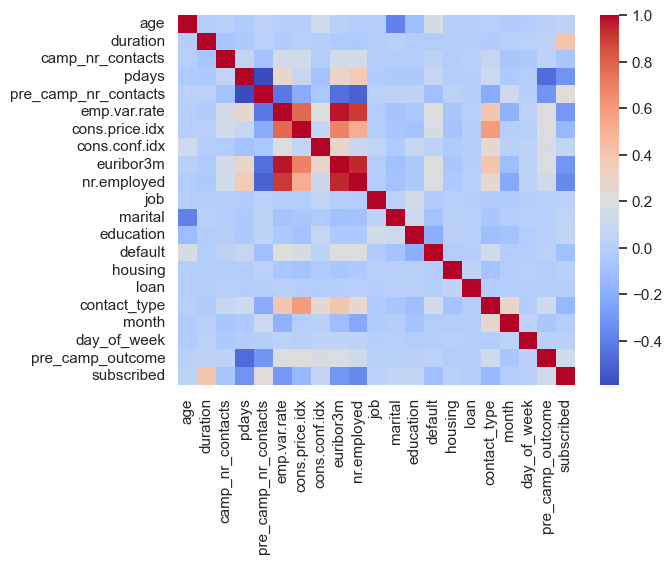

In [7]:
# encode categorical variables to integers and plot the correlation matrix
cat_encoded = cat.apply(lambda x: x.astype('category').cat.codes)
corr = pd.concat([num, cat_encoded], axis=1).corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [8]:
# print the highly correlated variables
high_corr = corr[(abs(corr) >= 0.8) & (corr != 1)]
high_corr = high_corr.stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr = high_corr.drop_duplicates(subset=[0])
high_corr = high_corr.rename(columns={'level_0': 'var1', 
                                      'level_1': 'var2', 
                                      0: 'corr'}).reset_index(drop=True)
high_corr

,var1,var2,corr
0,emp.var.rate,euribor3m,0.972245
1,emp.var.rate,nr.employed,0.906970
2,euribor3m,nr.employed,0.945154


In [9]:
# print the moderately correlated variables
moderate_corr = corr[(abs(corr) >= 0.6) & (abs(corr) < 0.8)]
moderate_corr = moderate_corr.stack().reset_index()
moderate_corr = moderate_corr[moderate_corr['level_0'] != moderate_corr['level_1']]
moderate_corr = moderate_corr.drop_duplicates(subset=[0])
moderate_corr = moderate_corr.rename(columns={'level_0': 'var1', 
                                              'level_1': 'var2', 
                                              0: 'corr'}).reset_index(drop=True)
moderate_corr

,var1,var2,corr
0,emp.var.rate,cons.price.idx,0.775334
1,cons.price.idx,euribor3m,0.688230


**Highly correlated features include:**
* euribor 3 month rate, employment variation rate and number of employees.

**Moderately correlated features include:**
* euribor 3 month rate, employment variation rate and consumer price index.

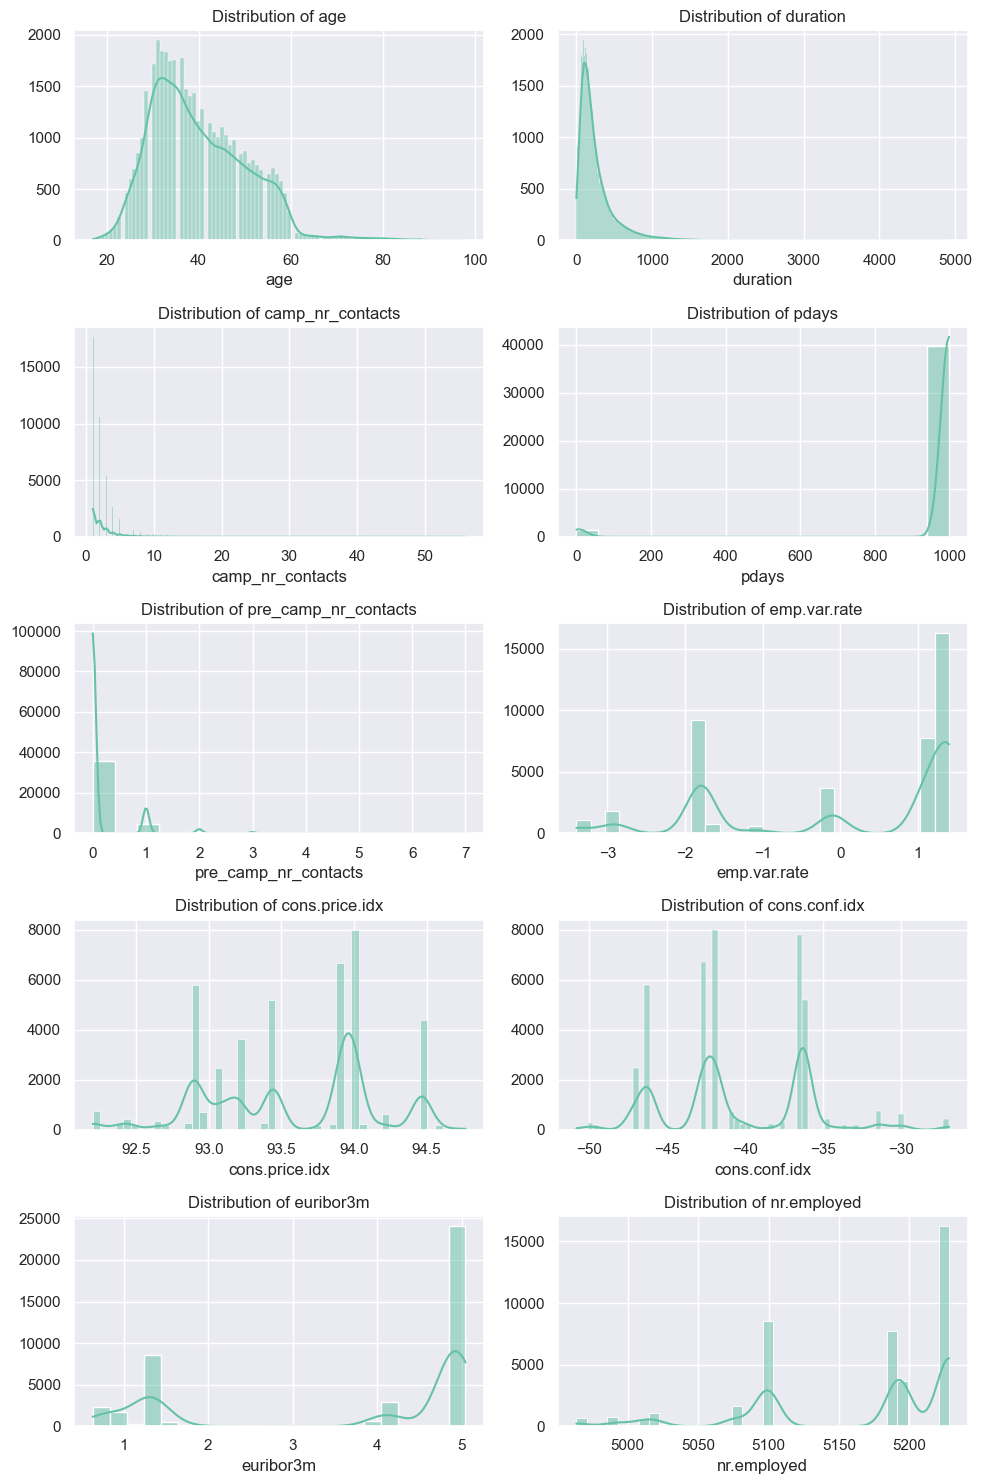

In [10]:
# plot the distribution of numerical variables
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
num_cols = num.columns
for i, ax in enumerate(axes.flatten()):
    sns.histplot(num[num_cols[i]], ax=ax, kde=True)
    ax.set_title(f'Distribution of {num_cols[i]}')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

* The `duration` and `camp_nr_contacts` are right-skewed.
* `pdays` is almost binary and is highly correlated with `pre_campaign_nr_contacts`, so I dropped this column.

In [11]:
# drop pdays
data.drop('pdays', axis=1, inplace=True)

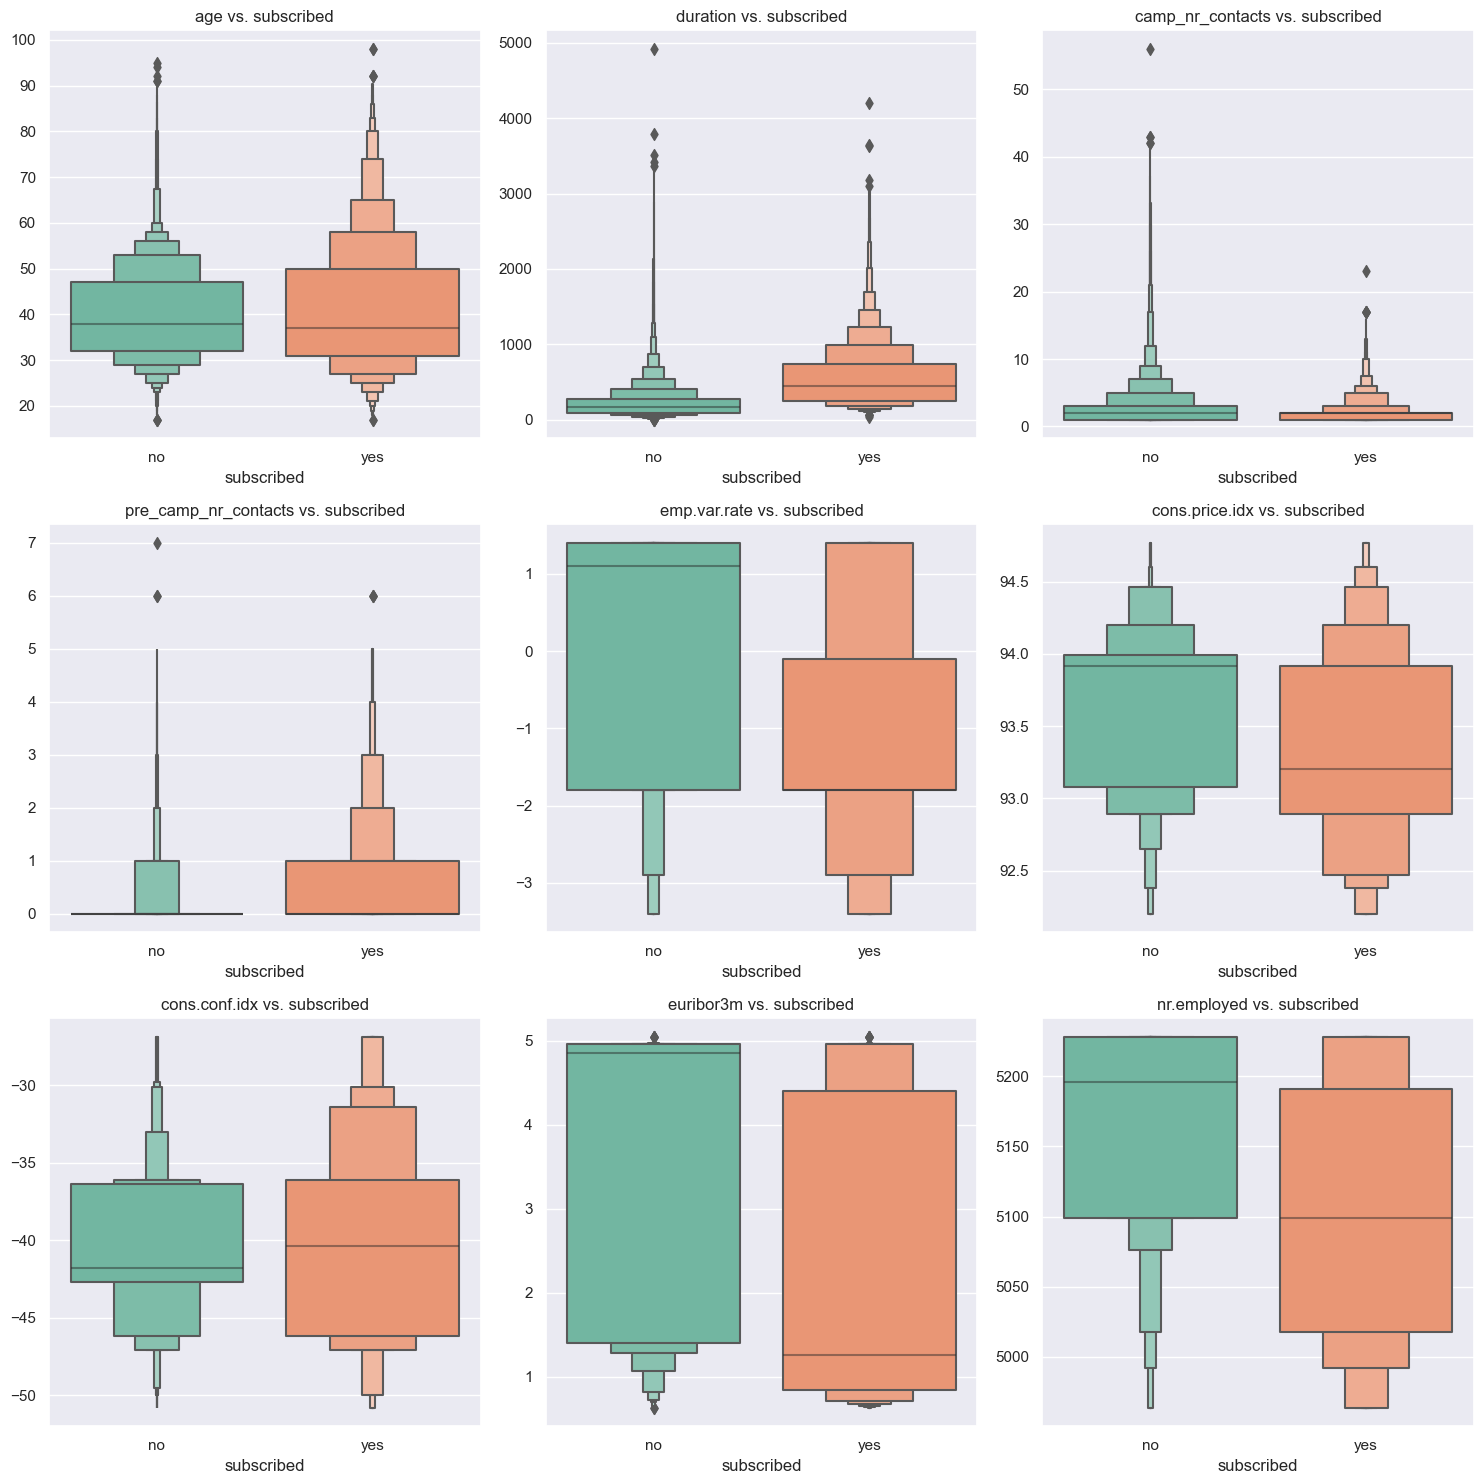

In [12]:
# plot the boxenplot of numerical variables vs. y
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
cols = data.select_dtypes(exclude=['object', 'category']).columns
for i, ax in enumerate(axes.flatten()):
    sns.boxenplot(x='subscribed', y=cols[i], data=data, ax=ax)
    ax.set_title(f'{cols[i]} vs. subscribed')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

* Older clients were more likely to subscribe. 
* Clients who subscribed tended to have longer phone call durations.
* Subscribed clients had fewer contacts during this campaign, but more contacts during the last campaign.
* The subscription rate rose when the employment variation rate, consumer price index, consumer confidence index, Euribor 3-month rate, and number of employees indicator decreased.

In [13]:
# map the month to integer for time series analysis
data['month'] = data['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun':6,
                                   'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec':12})

In [14]:
# binary encode the target variable
data['subscribed'] = data['subscribed'].map({'no': 0, 'yes': 1})
# check the subscription rate
print(f"The subscription rate is {data['subscribed'].mean().round(4) * 100}%")

The subscription rate is 11.27%


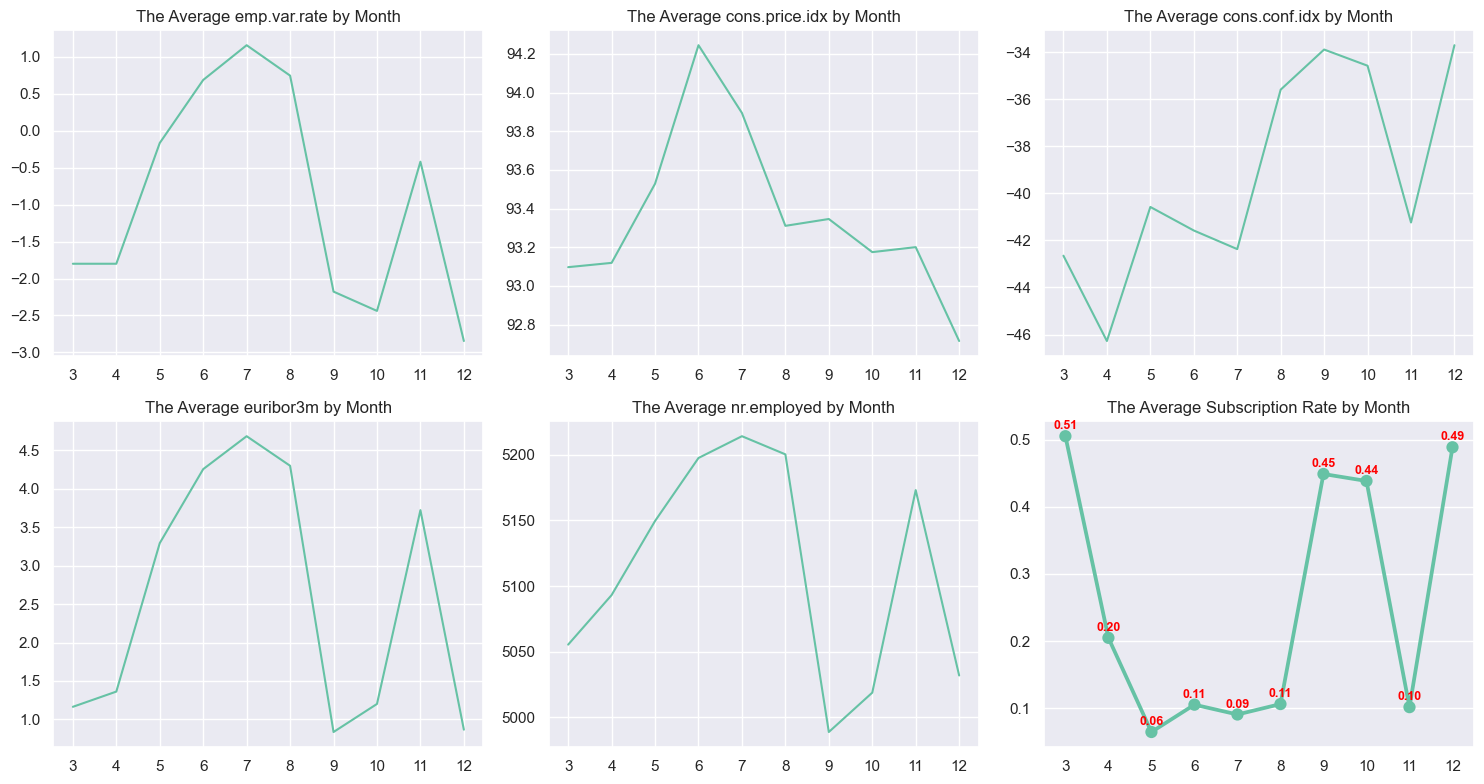

In [15]:
# plot the time series plot of month vs. socio-economic variables
vars = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes_flat = axes.flatten()
for i, var in enumerate(vars):
    sns.lineplot(x='month', y=var, data=data, ax=axes_flat[i],
                 ci=None, estimator='mean')
    axes_flat[i].set_title(f'The Average {var} by Month')
    axes_flat[i].set_xlabel('')
    axes_flat[i].set_ylabel('')
    # show all xticks
    axes_flat[i].set_xticks(data['month'].unique())

sns.pointplot(x='month', y='subscribed', data=data, ax=axes_flat[-1], ci=None)
axes_flat[-1].set_title('The Average Subscription Rate by Month')
axes_flat[-1].set_ylabel('')
axes_flat[-1].set_xlabel('')
# add the aggregated value to the pointplot as annotation
mean = data.groupby('month')['subscribed'].mean()
for j, mean in enumerate(mean):
    axes_flat[-1].annotate(f'{mean:.2f}', xy=(j, mean), xytext=(0, 5),
                            textcoords='offset points', ha='center',
                            color='red', size=9, weight='bold')

plt.tight_layout()
plt.show()

* The weighted average subscription rates were higher in March, September, October, and December when the employment variation rate, consumer price index, consumer confidence index, Euribor 3-month rate, and number of employees were lower.

In [16]:
# transform age to age range
data['age_range'] = pd.cut(data['age'],
                           bins=[-np.inf, 30, 40, 50, np.inf],
                           labels=['age <= 30', 'age 30-40', 'age 40-50', 'age > 50'])
data[['age', 'age_range']].sample(10)

,age,age_range
22089,29,age <= 30
25272,39,age 30-40
8763,23,age <= 30
16145,58,age > 50
14927,58,age > 50
12166,42,age 40-50
12417,31,age 30-40
16735,58,age > 50
16162,55,age > 50
24885,39,age 30-40


In [17]:
# transform month back to categorical variable
data['month'] = data['month'].astype('category')

In [18]:
# define a function to plot the countplot and pointplot of the subscription by a categorical variable
def plot_count_point(cat_col, target_col, data):
    """
    Plot the countplot and pointplot of the weighted average rate by a categorical variable.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    order = list(data[cat_col].value_counts().sort_values(ascending=False).index)
    sns.countplot(x=cat_col, data=data, width=0.5, order=order, ax=axes[0])
    axes[0].set_title(f'Distribution of {cat_col.capitalize()}')
    axes[0].set_xlabel('')
    axes[0].set_xticklabels(labels=order, rotation=45)

    sns.pointplot(x=cat_col, y=target_col, data=data, ci=None, order=order, ax=axes[1])
    axes[1].set_title(f'The Weighted Average {target_col.capitalize()} Rate by {cat_col.capitalize()}')
    axes[1].set_xlabel('')
    axes[1].set_xticklabels(labels=order, rotation=45)

    # add the aggregated value to the pointplot as annotation
    mean = data.groupby(cat_col)[target_col].mean().reindex(order)
    for i, mean in enumerate(mean):
        axes[1].annotate(f'{mean:.3f}', xy=(i, mean), xytext=(0, 5),
                    textcoords='offset points', ha='center',
                    color='black', size=8, weight='bold')

    plt.tight_layout()
    plt.show()

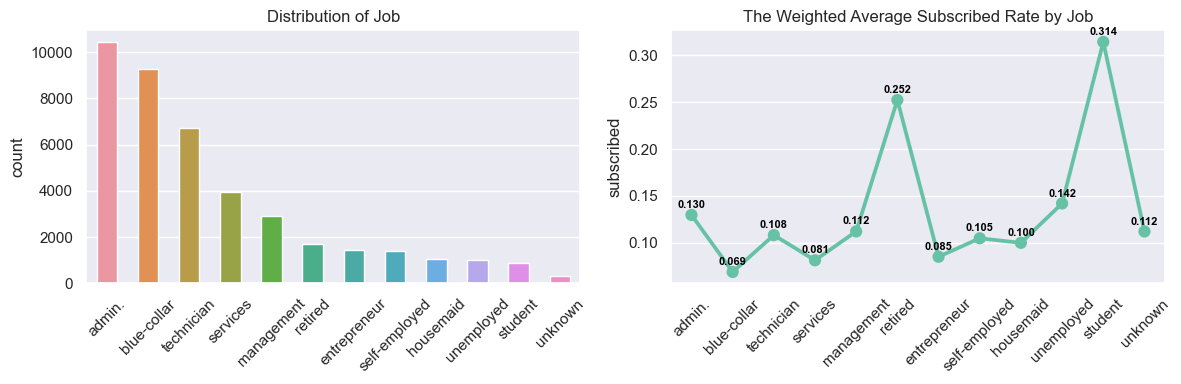

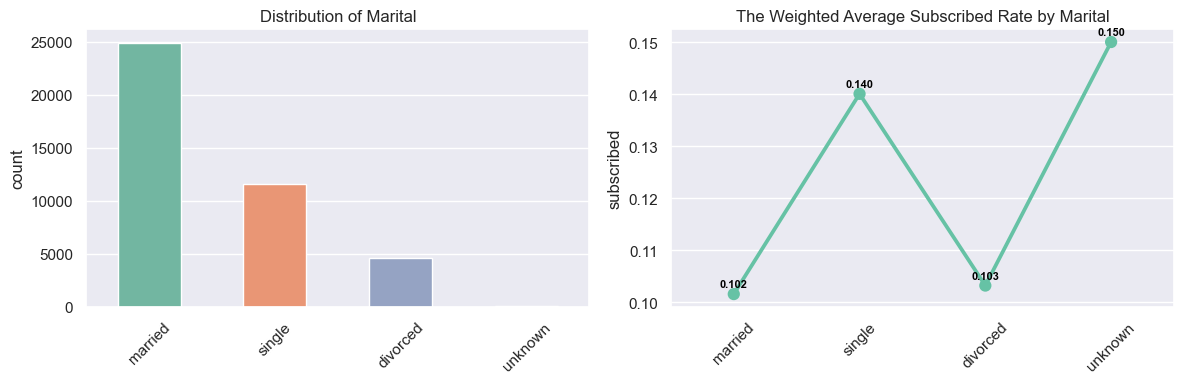

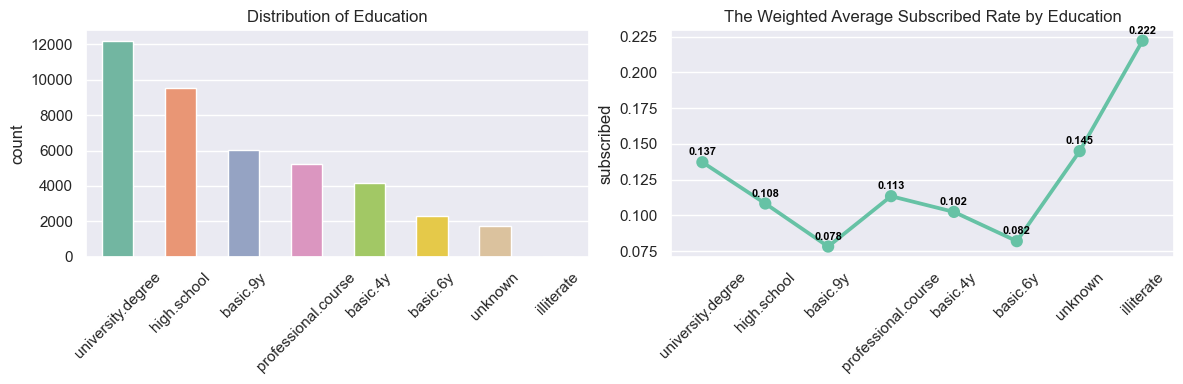

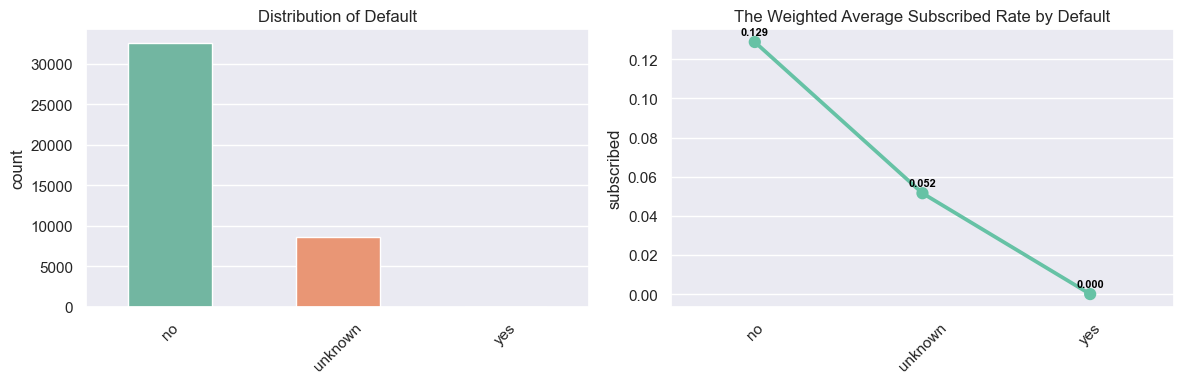

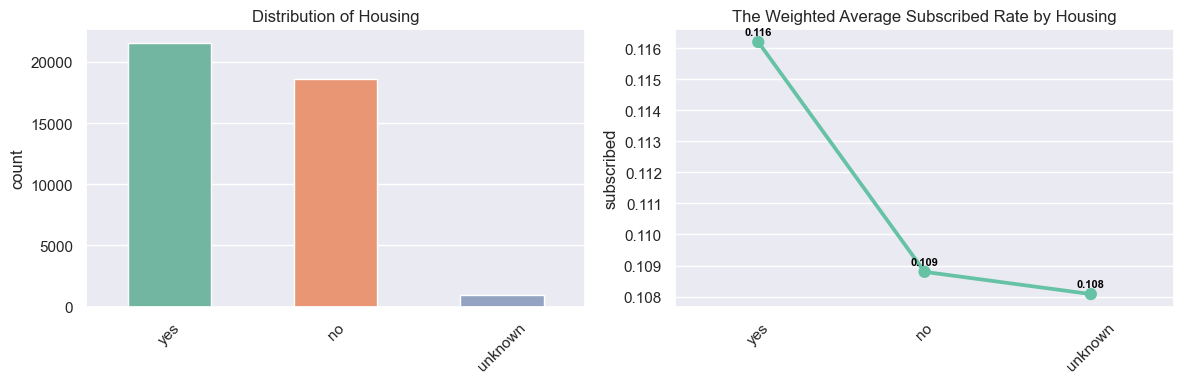

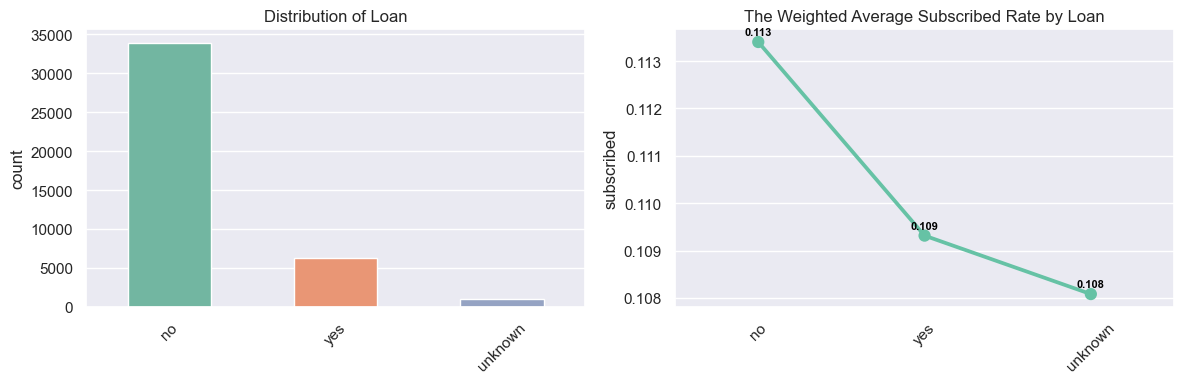

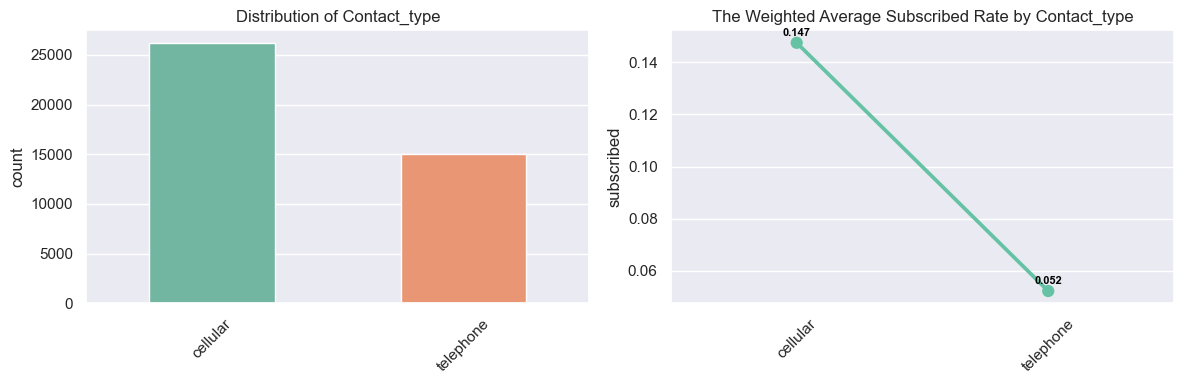

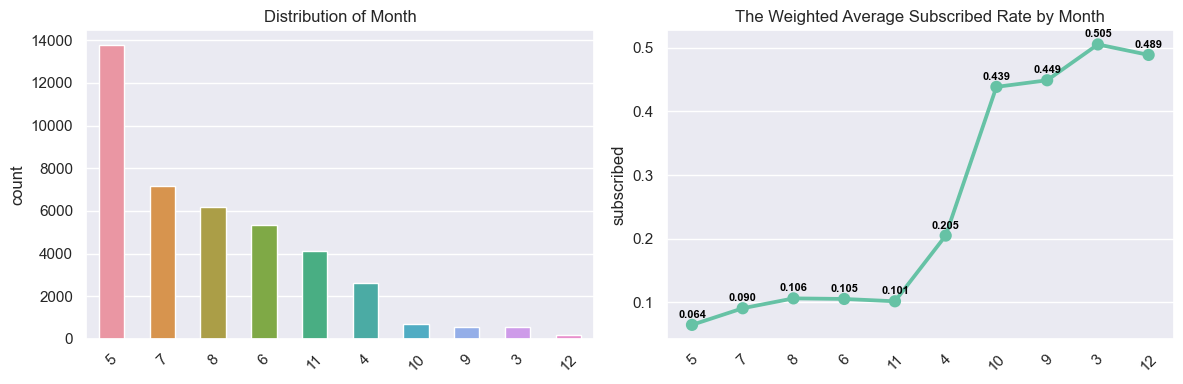

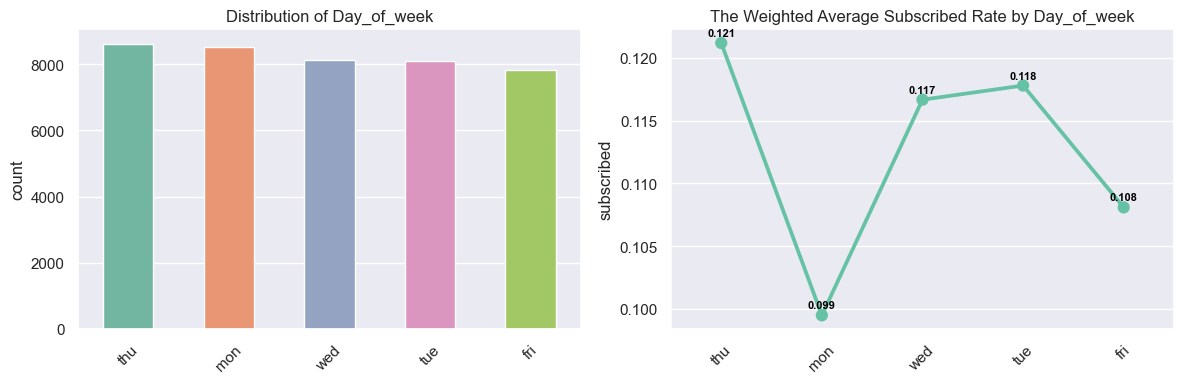

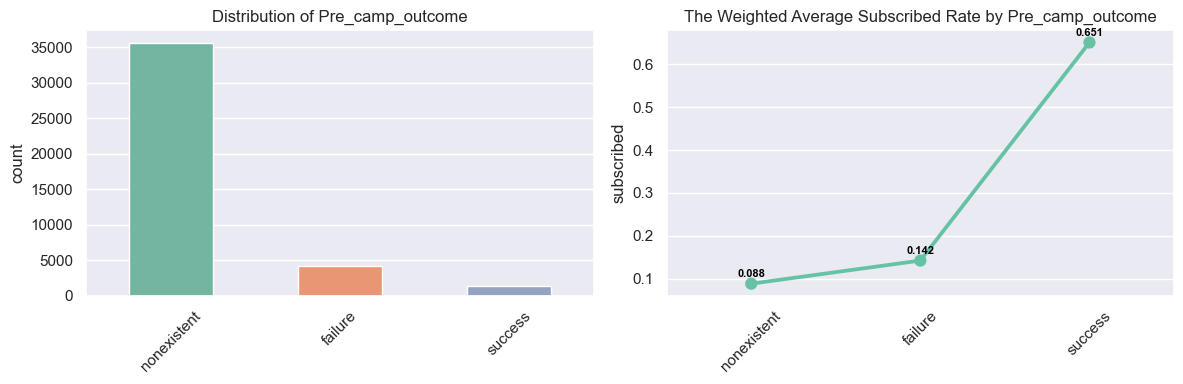

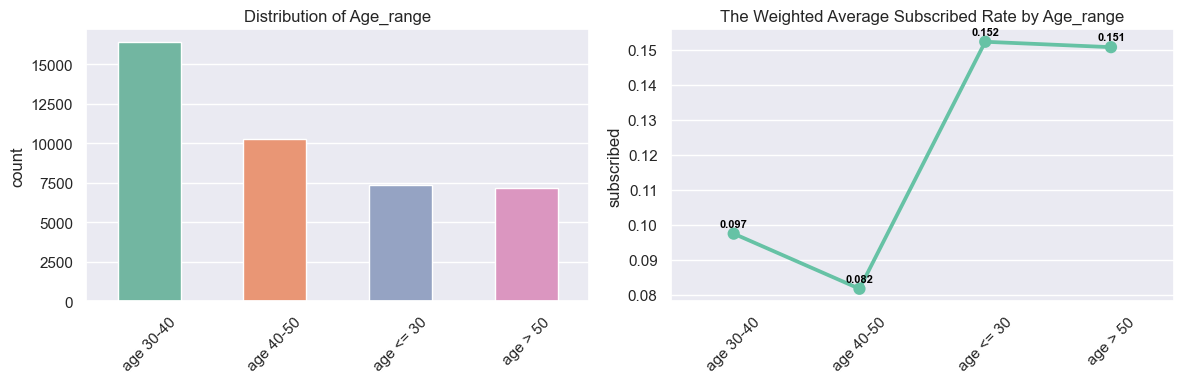

In [19]:
# plot the countplot and pointplot of the subscription by categorical variables
cat_cols = data.select_dtypes(include=['object','category']).columns
for col in cat_cols:
    plot_count_point(col, 'subscribed', data)

* Regarding clients' occupations, the three largest occupations among those contacted during this campaign were admin, blue-collar, and technician, but they had relatively lower subscription rates. In contrast, though the number of retired and student clients was lower, they had relatively higher subscription rates. In particular, although the blue-collar occupation was the second-largest group contacted during the campaign, it had the lowest subscription rate. Conversely, students, who was the second-smallest group, had the highest subscription rate. 
* Regarding clients' marital status, although most of them were married, this group had the lowest subscription rate among those contacted. Individuals with a single marital status or unknown status had relatively higher subscription rates.
* Regarding clients' education, illiterate individuals had the highest subscription rate, but they had the smallest client base. Individuals with university degrees represented the largest client base, and the subscription rate ranked third among different education levels.
* Regarding default history, clients with no previous defaults had the highest subscription rate, whereas individuals with previous defaults did not subscribe at all.
* Clients with housing loans and personal loans had relatively higher subscription rates, and those contacted via cellular phone were more likely to subscribe than those contacted by telephone. 
* While most clients were contacted between May and August, subscription rates were relatively lower during this period.
* Client subscription rates were lowest on Monday and highest on Thursday.
* Clients who subscribed successfully in the previous campaign are more likely to subscribe in this one as well.
* Clients aged below 30 or above 50 are more inclined to subscribe.

In [20]:
# drop the age_range and duration columns since the duration is not known before a call is performed
data = data.drop(['age_range', 'duration', 'emp.var.rate'], axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact_type,month,day_of_week,camp_nr_contacts,pre_camp_nr_contacts,pre_camp_outcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,1,0,nonexistent,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,5,mon,1,0,nonexistent,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,5,mon,1,0,nonexistent,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,mon,1,0,nonexistent,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,5,mon,1,0,nonexistent,93.994,-36.4,4.857,5191.0,0


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
seed = 1

In [22]:
# split the data into two DataFrames: X (features) and y (target variable)
y = data['subscribed']
X = data.drop(columns='subscribed', axis=1)

As the dataset includes some categorical features, one-hot encoding is required to prepare the data for models. In addition, the numerical data have different scales. This requires the use of a standardization scaler for data preprocessing.

In [23]:
# dummy encoding the features
X_dummy = pd.get_dummies(X, drop_first=True)

# split the data into train and test subsets and stratified sampling the test data size to be 30%
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=seed, stratify=y)

# standardize the data
scaler_standard = StandardScaler()
X_train = scaler_standard.fit_transform(X_train)
X_test = scaler_standard.transform(X_test)

In [24]:
# set up the models and KFold
kf = KFold(n_splits=5, random_state=seed, shuffle=True)
gnb = GaussianNB()
lr = LogisticRegression(random_state=seed)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
svc = SVC(random_state=seed, probability=True)
models = [gnb, lr, knn, tree, rf, svc]

In [25]:
# create df to store the cross validation results of each model
cv_results = pd.DataFrame(columns=['model', 'cv_accuracy'])

# cross validation
for model in models:
    cv_results_accuracy = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1)
    cv_results = pd.concat([cv_results,
                            pd.DataFrame({
                                'model': [model.__class__.__name__],
                                'cv_accuracy': [cv_results_accuracy.mean()]
                                })
                            ])

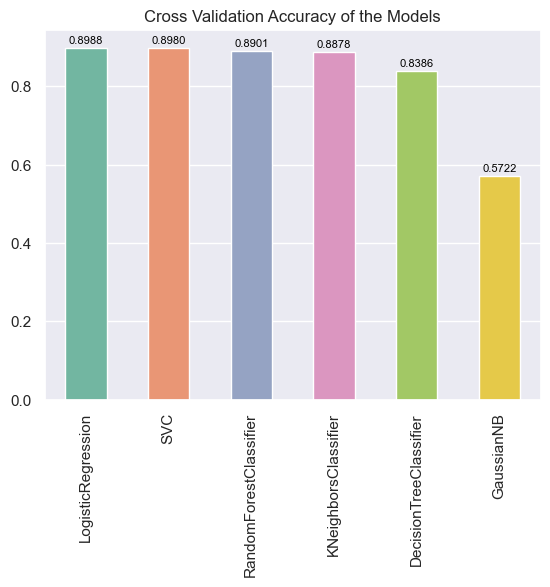

In [26]:
# plot the cross validation accuracy of the models
cv_results = cv_results.sort_values(by='cv_accuracy', ascending=False).reset_index(drop=True)
sns.barplot(x='model', y='cv_accuracy', data=cv_results, width=0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Cross Validation Accuracy of the Models')

# add annotation to the barplot
for i, acc in enumerate(cv_results['cv_accuracy']):
    plt.annotate(f'{acc:.4f}', xy=(i, acc), xytext=(0, 3),
                 textcoords='offset points', ha='center',
                 color='black', size=8)

plt.show()

Given the subscription rate was 11.27%, any model with an accuracy lower than 0.8873 is not useful for predicting. Therefore, GaussianNB and Decision Tree are not suitable for this dataset. 

In [27]:
# define the models to test
lr = LogisticRegression(random_state=seed)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(random_state=seed)
svc = SVC(random_state=seed, probability=True)
models = [lr, knn, rf, svc]

In [28]:
# fit the models and predict
# print the classification report of each model
# construct a dataframe to store the classification report of the models
report_data = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'Classification Report of {model.__class__.__name__}:')
    print(classification_report(y_test, y_pred))
    print('------------------------------------------------------------')
    
    report = classification_report(y_test, y_pred, output_dict=True)
    model_name = model.__class__.__name__
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    report_data.append({'model': model_name, 'accuracy': accuracy,
                        'precision': precision, 'recall': recall, 'f1-score': f1_score})

report = pd.DataFrame(report_data)
report = report.sort_values(by='accuracy', ascending=False).reset_index(drop=True)

Classification Report of LogisticRegression:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10965
           1       0.67      0.23      0.34      1392

    accuracy                           0.90     12357
   macro avg       0.79      0.61      0.64     12357
weighted avg       0.88      0.90      0.88     12357

------------------------------------------------------------
Classification Report of KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10965
           1       0.52      0.25      0.34      1392

    accuracy                           0.89     12357
   macro avg       0.72      0.61      0.64     12357
weighted avg       0.87      0.89      0.87     12357

------------------------------------------------------------
Classification Report of RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.92     

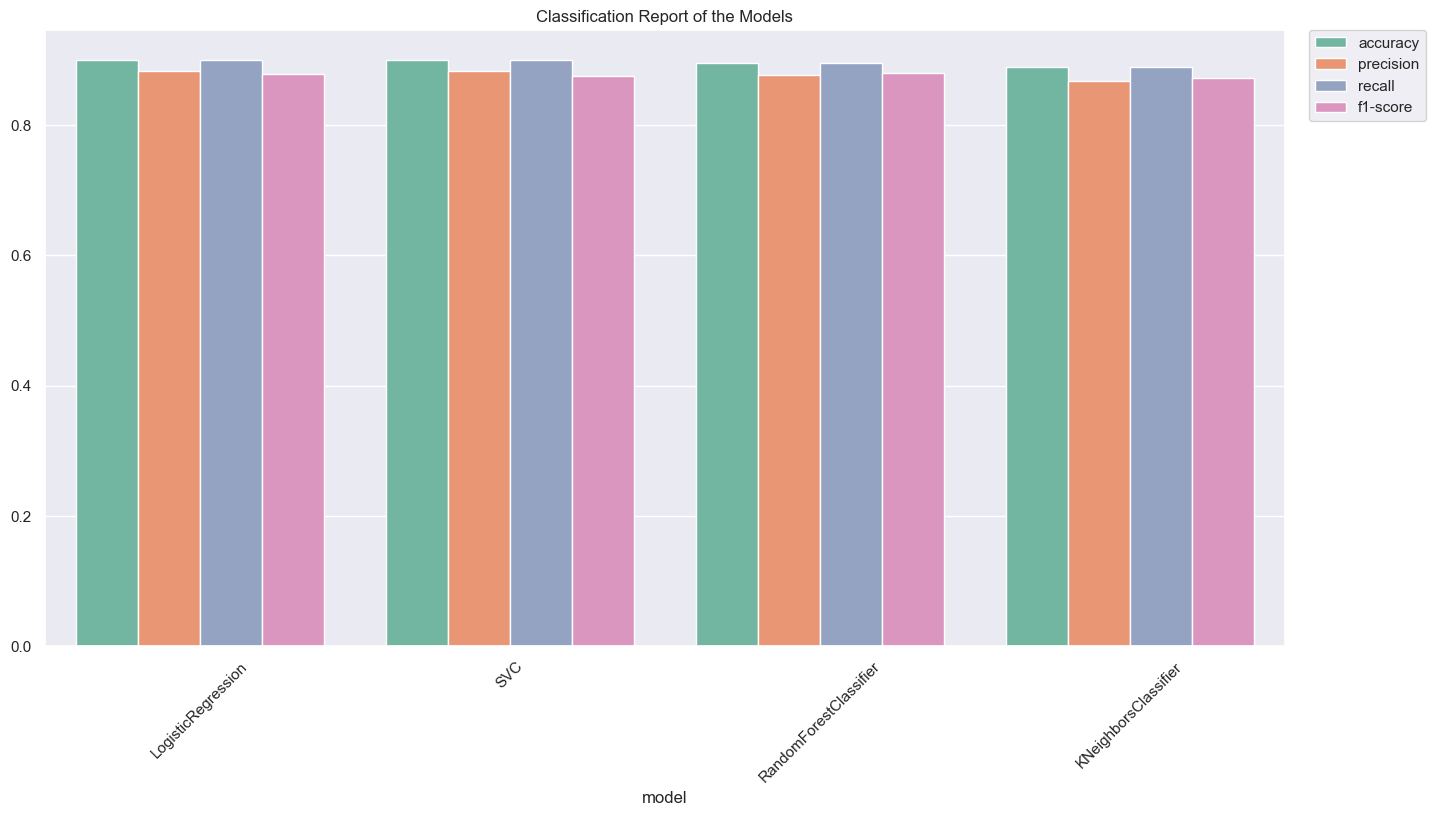

,model,accuracy,precision,recall,f1-score
0,LogisticRegression,0.9005,0.8829,0.9005,0.8782
1,SVC,0.9001,0.8827,0.9001,0.8758
2,RandomForestClassifier,0.8947,0.8764,0.8947,0.8807
3,KNeighborsClassifier,0.8897,0.8670,0.8897,0.8722


In [29]:
# plot the stacked barplot of the classification report
report_melt = report.melt(id_vars='model', 
                          value_vars=['accuracy' ,'precision', 'recall', 'f1-score'])

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='model', y='value', hue='variable', data=report_melt, ax=ax, width=0.8)
ax.set_ylabel('')
ax.set_title('Classification Report of the Models')

# rotate the xticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# move the legend outside the plot
ax.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)

plt.show()

report.round(4)

As our ultimate goal is to help the bank to increase the subscription rate, we want the model to have the highest precision on the truly subscribed clients. According to the classification report, the Support Vector Machines model achieved the highest precision of 0.68 on the truly subscribed clients, which means that 68% of the clients that the model predicted as subscribed were truly subscribed clients. 

In [30]:
import pickle

In [31]:
# save the trained SVC model and the scaler to files
with open('model.pkl', 'wb') as f:
    pickle.dump(svc, f)
    
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler_standard, f)